# Explore here

### Paso 1: Carga del conjunto de datos


In [1]:
import pandas as pd

df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=2546&path=sales.csv')
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


### Paso 2: Construye y analiza la serie temporal

In [2]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633
...,...
2023-08-30 17:10:08.079328,989.600354
2023-08-31 17:10:08.079328,994.987326
2023-09-01 17:10:08.079328,995.814415


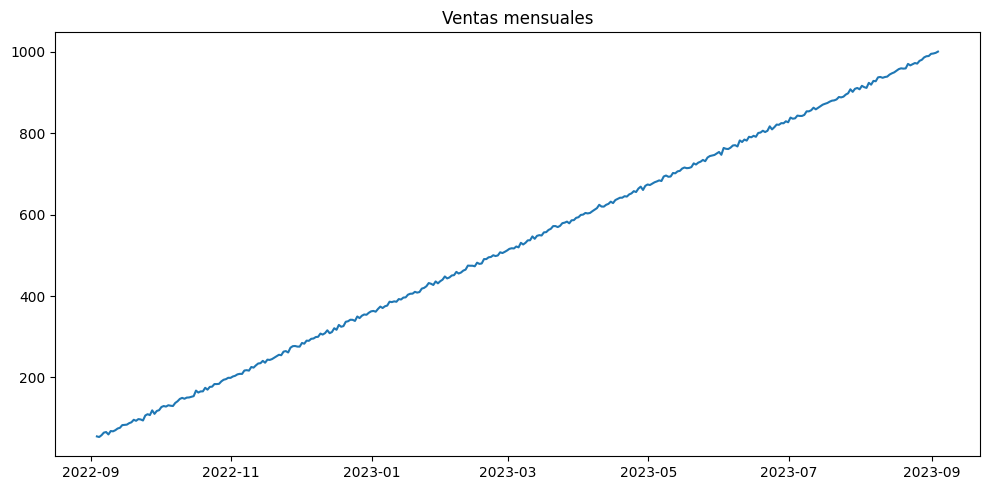

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
plt.plot(df['sales'])
plt.title('Ventas mensuales')
plt.tight_layout()
plt.show()

### ¿Cuál es el tensor de la serie temporal?

In [4]:
print(df.index.inferred_freq)

D


El tensor es Diario


### ¿Cuál es la tendencia?

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, period = 7)
decomposition

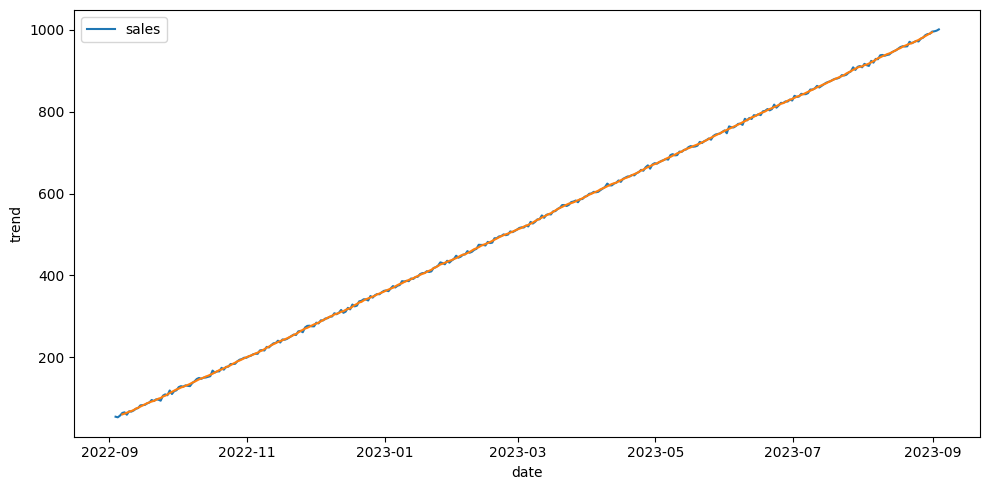

In [6]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize=(10,5))
sns.lineplot(data = df)
sns.lineplot(data = trend)
plt.tight_layout()
plt.show()

La tendencia es Ascendente

### ¿Es estacionaria?

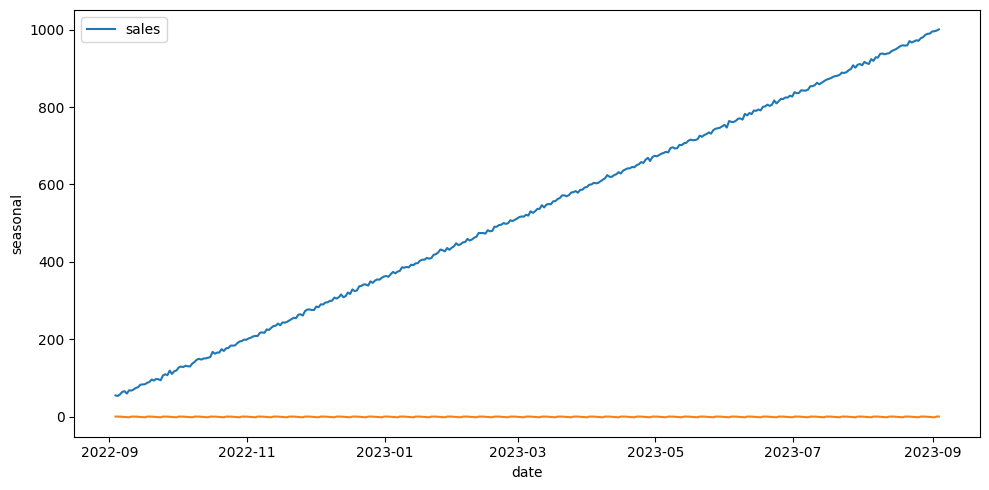

In [7]:
seasonal = decomposition.seasonal

fig,axis = plt.subplots(figsize=(10,5))
sns.lineplot(data=df)
sns.lineplot(data=seasonal)
plt.tight_layout()
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(df)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

El p-value es mayor a 0.05 por lo tanto...
La serie no es estacionaria. Esto confirma que la media de las ventas cambia con el tiempo.

### ¿Existe variabilidad o presencia de ruido?

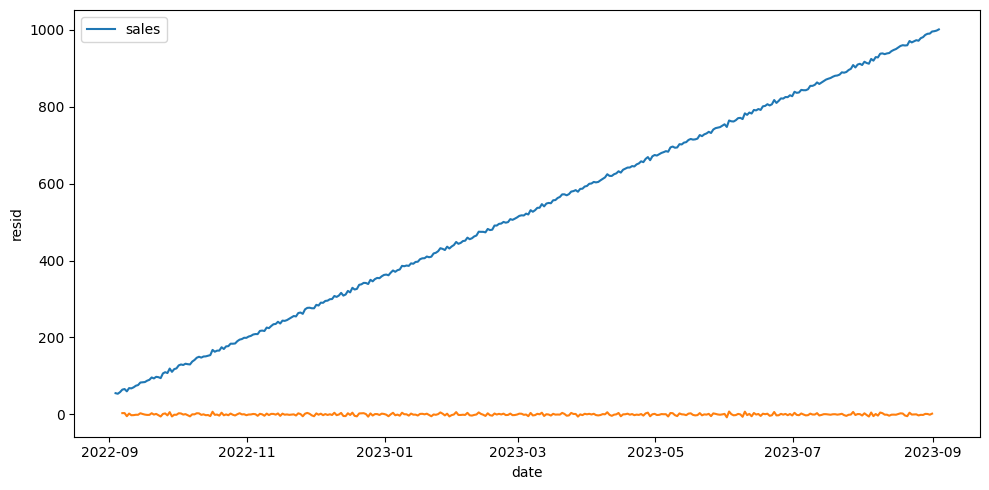

In [9]:
residual = decomposition.resid
fig,axis = plt.subplots(figsize=(10,5))
sns.lineplot(data=df)
sns.lineplot(data = residual)
plt.tight_layout()
plt.show()

Sí, hay presencia de ruido blanco. Se identifica en el componente de residuos (línea naranja), que muestra fluctuaciones aleatorias alrededor de cero que no siguen un patrón predecible.

In [10]:
from pmdarima import auto_arima
model = auto_arima(df, seasonal = True, trace = True, m = 7)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=2.60 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1966.396, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2209.657, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1970.972, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=1968.120, Time=0.28 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=1968.220, Time=0.23 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=1966.919, Time=0.09 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=1965.376, Time=0.79 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=1965.211, Time=0.90 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=1963.937, Time=0.64 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=1967.822, Time=0.24 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=2094.918, Time=0.67 sec
 ARIMA(2,1,0)(1,0,2)[7] intercept   : AIC=1

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  366
Model:             SARIMAX(3, 1, 1)x(0, 0, [1, 2], 7)   Log Likelihood                -910.839
Date:                                Thu, 19 Feb 2026   AIC                           1837.678
Time:                                        19:20:16   BIC                           1868.878
Sample:                                    09-03-2022   HQIC                          1850.077
                                         - 09-03-2023                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3181      0.261      8.889      0.000       1.807       2.829
ar.L1         -0.0421      0.052     -0.812      0.417      -0.144       0.060
ar.L2          0.0838      0.057      1.473      0.141      -0.028       0.195
ar.L3          0.0666      0.053      1.258      0.208      -0.037       0.170
ma.L1         -0.9893      0.023    -42.831      0.000      -1.035      -0.944
ma.S.L7        0.1666      0.053      3.152      0.002       0.063       0.270
ma.S.L14       0.0612      0.055      1.108      0.268      -0.047       0.169
sigma2         8.3860      0.652     12.871      0.000       7.109       9.663
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.49
Prob(Q):                              0.88   Prob(JB):                         0.78
Heteroskedasticity (H):               0.87   Skew:                             0.05
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Paso 4: Predice con el conjunto de test

In [12]:
forecast = model.predict(7)
forecast

2023-09-04 17:10:08.079328    1002.788514
2023-09-05 17:10:08.079328    1005.223633
2023-09-06 17:10:08.079328    1007.399024
2023-09-07 17:10:08.079328    1010.375730
2023-09-08 17:10:08.079328    1012.566165
2023-09-09 17:10:08.079328    1015.161059
2023-09-10 17:10:08.079328    1017.883938
Freq: D, dtype: float64

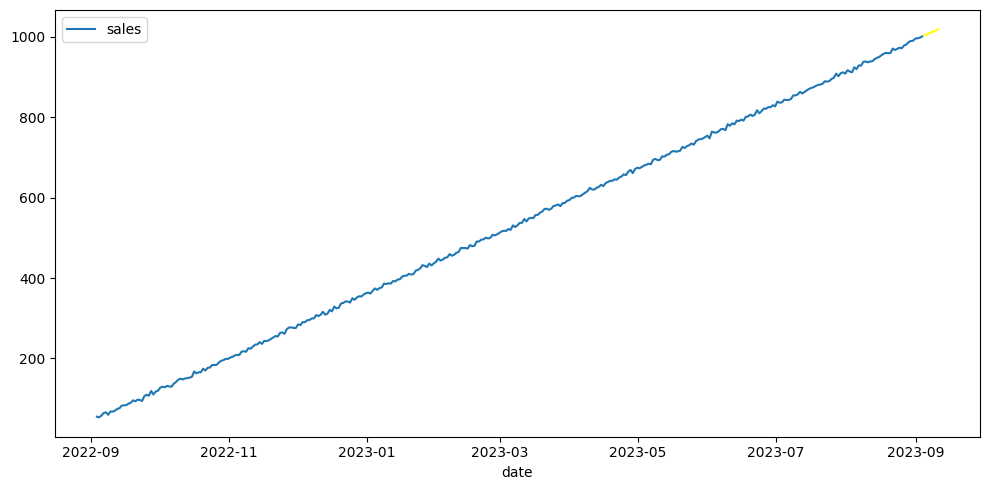

In [14]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)
sns.lineplot(data = forecast, c = "yellow")

plt.tight_layout()

plt.show()